In [103]:
from compounds_research.compound.utils import plot_utilization_vs_rate, plot_raw_data,  plot_market_util, plot_market_rates, c_markets, make_rates_df, get_comp_market
from compounds_research.compound.fetch_compound import make_dataframe, token_addresses, variables
from compounds_research.plotting import plot_interest_rate
from compounds_research.utils import get_market

from compounds_research.aave import analyze_aave

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [105]:
aave = analyze_aave.load_data()

In [112]:
aave

Available Liquidity                                                 Id  \
0             2.562574e+26  0x6009a11f6282a5c7cf22bcb75db73f5ae1ae7ca5d6bf...   
1             5.083824e+24  0xc4c53322f096ba3e26eb06f8d9573cb440339d18132f...   
2             9.682895e+23  0xc5dde1d32b311e9591cce0a25b9ac4807314e969c62d...   
3             2.934771e+12  0x81174b60b80d3df188805a98ed60074804ad344ac2d7...   
4             4.760488e+09  0xe2e78a56d59ef41eecf2829193a0b8819c851b03c7ee...   
...                    ...                                                ...   
40595         3.152684e+19  0x5cf2cad66b0fbb6e2d32f31addb11443a5c54887f786...   
40596         6.305368e+19  0x0ae2a6f2883a25bc5fecd429460a37938a5edfb4aad7...   
40597         0.000000e+00  0x9b02ca82d622b4cc82e77f42d66901df9dc4d8f4d973...   
40598         4.273100e+04  0x75019cc109721c59bf70a4a51f40f94fedfe06dbb9aa...   
40599         1.192741e+20  0x921d344892e58d5c33acf93331c119c76d0604d72577...   

       Liquidity Index  Liquidity Rate  Stable Borrow Rate  Total Borrows  \
0             1.000043    6.289862e-07            0.030155   3.181885e+23   
1             1.000024    7.633862e-05            0.033424   1.431934e+23   
2             1.017254    1.339028e-02            0.112446   5.619529e+23   
3             1.011664    1.796996e-02            0.135826   2.754200e+12   
4             1.000071    6.540940e-04            0.040089   4.179537e+08   
...                ...             ...                 ...            ...   
40595         1.000000    0.000000e+00            0.030000   0.000000e+00   
40596         1.000000    0.000000e+00            0.030000   0.000000e+00   
40597         1.000000    0.000000e+00            0.030000   0.000000e+00   
40598         1.000000    0.000000e+00            0.030000   0.000000e+00   
40599         1.000000    0.000000e+00            0.039000   0.000000e+00   

       Total Borrows Stable  Total Borrows Variable  Total Liquidity  \
0              2.653198e+21            3.155353e+23     2.565756e+26   
1              2.409587e+20            1.429525e+23     5.227017e+24   
2              2.878638e+22            5.331665e+23     1.530242e+24   
3              1.043521e+11            2.649848e+12     5.688971e+12   
4              4.600070e+05            4.174937e+08     5.178442e+09   
...                     ...                     ...              ...   
40595          0.000000e+00            0.000000e+00     3.152684e+19   
40596          0.000000e+00            0.000000e+00     6.305368e+19   
40597          0.000000e+00            0.000000e+00     0.000000e+00   
40598          0.000000e+00            0.000000e+00     4.273100e+04   
40599          0.000000e+00            0.000000e+00     1.192741e+20   

       Utilization Rate  Variable Borrow Rate  \
0              0.001240              0.000124   
1              0.027395              0.002739   
2              0.367231              0.032952   
3              0.484130              0.034206   
4              0.080710              0.008071   
...                 ...                   ...   
40595          0.000000              0.000000   
40596          0.000000              0.000000   
40597          0.000000              0.000000   
40598          0.000000              0.000000   
40599          0.000000              0.010000   

                                       Reserve.id Reserve.symbol  \
0      0x80fb784b7ed66730e8b1dbd9820afd29931aab03           LEND   
1      0x514910771af9ca656af840dff83e8264ecf986ca           LINK   
2      0x6b175474e89094c44da98b954eedeac495271d0f            DAI   
3      0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48           USDC   
4      0x2260fac5e5542a773aa44fbcfedf7c193bc2c599           WBTC   
...                                           ...            ...   
40595  0xe41d2489571d322189246dafa5ebde1f4699f498            ZRX   
40596  0xe41d2489571d322189246dafa5ebde1f4699f498            ZRX   
40597  0x2260fac5e5542a773aa44fbcfedf7c193b

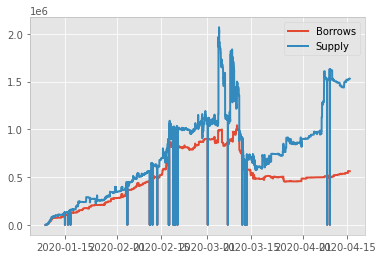

In [124]:
plt.plot(aave[aave['Currency'] == 'DAI']['Datetime'], aave[aave['Currency'] == 'DAI']['Total Borrows']/1e18, label='Borrows')
plt.plot(aave[aave['Currency'] == 'DAI']['Datetime'], aave[aave['Currency'] == 'DAI']['Total Liquidity']/1e18, label='Supply')
plt.legend()

In [74]:
plt.style.use('ggplot')
plt.rc('axes',edgecolor='darkgrey')
plt.rcParams["axes.linewidth"]  = 0.5

## Data Exploration
This notebook examines a given market across the different lending platforms Aave, Compound and dYdX.

### Load Data

In [23]:
comp_dai = get_market('dai', 'compound')

In [62]:
comp_dai

borrow_rates  exchange_rates  supply_rates  \
date                                                              
2019-11-09 16:24:00      0.020201        0.000000      0.000000   
2019-11-14 16:20:00      0.020201        0.020000      0.000000   
2019-11-14 17:27:30      0.020201        0.020000      0.000000   
2019-11-14 17:33:00      0.020201        0.020000      0.000000   
2019-11-14 17:34:15      0.020201        0.020000      0.000000   
...                           ...             ...           ...   
2020-05-07 23:37:30      0.013224        0.020458      0.007406   
2020-05-07 23:42:00      0.013225        0.020458      0.007406   
2020-05-07 23:52:15      0.013384        0.020458      0.007587   
2020-05-07 23:53:00      0.013544        0.020458      0.007768   
2020-05-07 23:54:15      0.013544        0.020458      0.007768   

                     total_borrows_history  total_supply_history  \
date                                                               
2019-11-09 16:24:00                    0.0                     0   
2019-11-14 16:20:00                    0.0                     0   
2019-11-14 17:27:30                    0.0                     0   
2019-11-14 17:33:00                    0.0                    50   
2019-11-14 17:34:15                    0.0                   100   
...                                    ...                   ...   
2020-05-07 23:37:30             11624104.0              19661560   
2020-05-07 23:42:00             11624105.0              19661461   
2020-05-07 23:52:15             11624108.0              19430964   
2020-05-07 23:53:00             11624108.0              19200473   
2020-05-07 23:54:15             11624109.0              19200384   

                     utilization_ratio    spread  
date                                              
2019-11-09 16:24:00                NaN  0.020201  
2019-11-14 16:20:00                NaN  0.020201  
2019-11-14 17:27:30                NaN  0.020201  
2019-11-14 17:33:00           0.000000  0.020201  
2019-11-14 17:34:15           0.000000  0.020201  
...                                ...       ...  
2020-05-07 23:37:30           0.591210  0.005818  
2020-05-07 23:42:00           0.591213  0.005818  
2020-05-07 23:52:15           0.598226  0.005797  
2020-05-07 23:53:00           0.605407  0.005777  
2020-05-07 23:54:15           0.605410  0.005777  

[91977 rows x 7 columns]

### Interest rates and utilization

In [42]:
# color map for each platform
platform_cmap = {
    'dydx': ('lightblue', 'slateblue'),
    'aave': ('lightcoral', 'tomato'),
    'compound': ('darkgreen', 'lightgreen')
}

In [60]:
def plot_platform_rates(market: str, platforms: list):
    lwidth = 1
    plt.figure(figsize=(12, 8))
    plt.ylabel('Interest Rate')
    for platform in platforms:
        df = get_market(market.lower(), platform.lower())
        plt.plot(df['borrow_rates'], label=platform+' Borrow', linewidth=lwidth, color='tomato')
        plt.plot(df['supply_rates'], label=platform+' Supply', linewidth=lwidth, color='steelblue')
    plt.legend()
    plt.show()

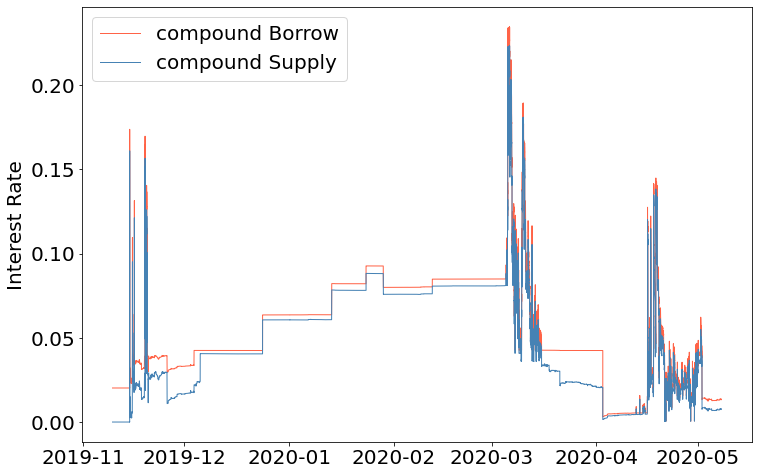

In [61]:
plot_platform_rates('dai', ['compound'])

### Liquidity and illiquidity

In [149]:
def plot_aave_liquidity(market: str, aave: pd.DataFrame):
    lwidth = 1
    fsize = 10
    plt.figure(figsize=(12, 8))
    plt.ylabel(market.capitalize(), fontdict={'size': fsize})
    plt.plot(aave[aave['Currency'] == market.upper()]['Datetime'], aave[aave['Currency'] == market.upper()]['Total Borrows']/1e18,  label='Borrow', linewidth=lwidth, color='tomato')
    plt.plot(aave[aave['Currency'] == market.upper()]['Datetime'], aave[aave['Currency'] == market.upper()]['Total Liquidity']/1e18, label='Supply', linewidth=lwidth, color='steelblue')
    plt.fill_between(aave[aave['Currency'] == market.upper()]['Datetime'], aave[aave['Currency'] == market.upper()]['Total Borrows']/1e18,aave[aave['Currency'] == market.upper()]['Total Liquidity']/1e18, color='aliceblue')
    plt.title('AAVE: ' + market.upper() + ' Liquidity', fontdict={'size': fsize})
    plt.legend(fontsize=fsize)
    ax = plt.gca()
    ax.set_facecolor('white')
    ax.grid(color='whitesmoke')
    plt.show()

In [142]:
def plot_comp_liquidity(market: str):
    lwidth = 1
    fsize = 10
    plt.figure(figsize=(12, 8))
    plt.ylabel(market.capitalize(), fontdict={'size': fsize})
    df = get_market(market.lower(), 'compound')
    plt.plot(df['total_borrows_history'], label='Borrow', linewidth=lwidth, color='tomato')
    plt.plot(df['total_supply_history'], label='Supply', linewidth=lwidth, color='steelblue')
    plt.fill_between(df.index,df['total_borrows_history'], df['total_supply_history'], color='aliceblue')
    plt.title('COMPOUND: ' + market.upper() + ' Liquidity', fontdict={'size': fsize})
    plt.legend(fontsize=fsize)
    ax = plt.gca()
    ax.set_facecolor('white')
    ax.grid(color='whitesmoke')
    plt.show()

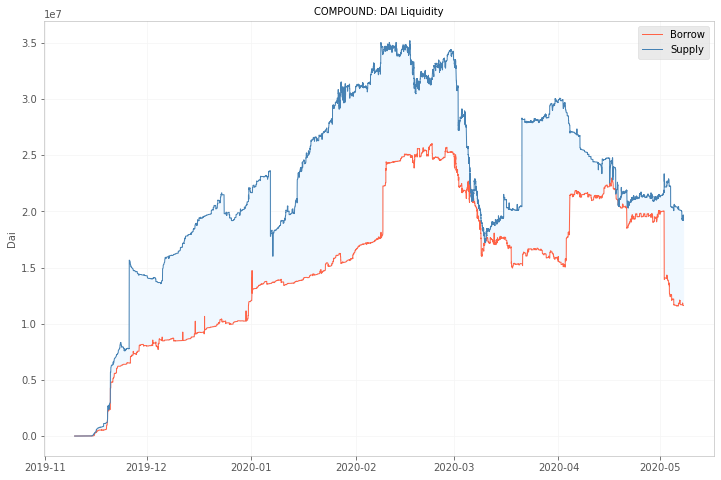

In [147]:
plot_comp_liquidity('dai')

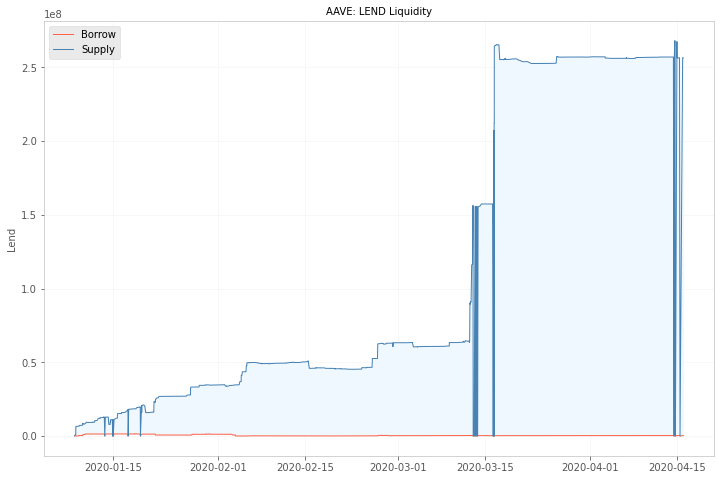

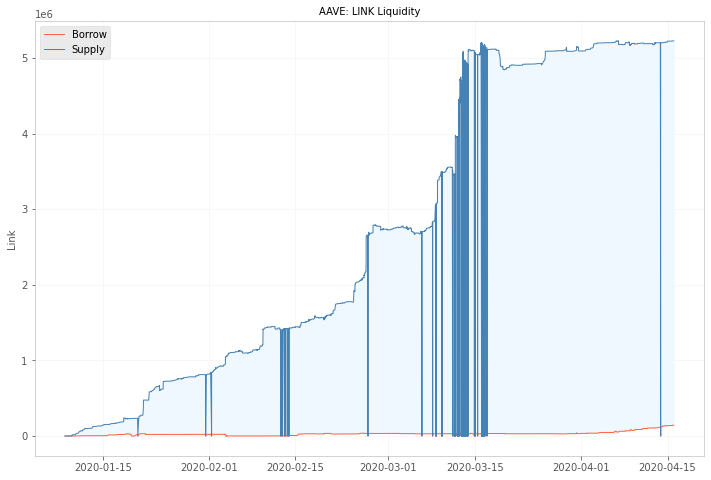

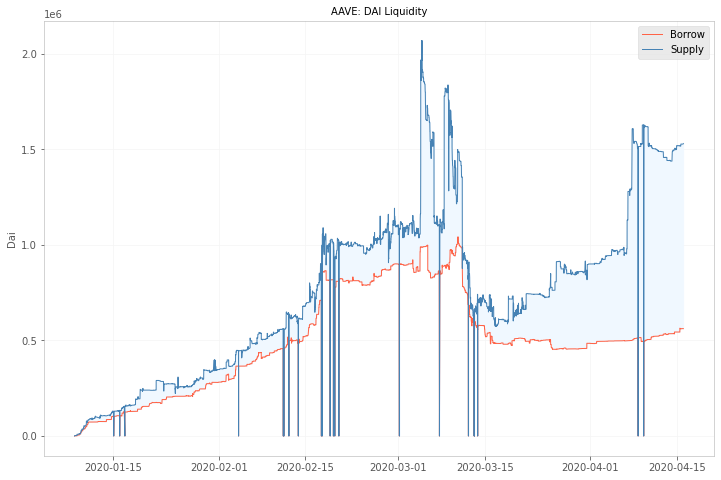

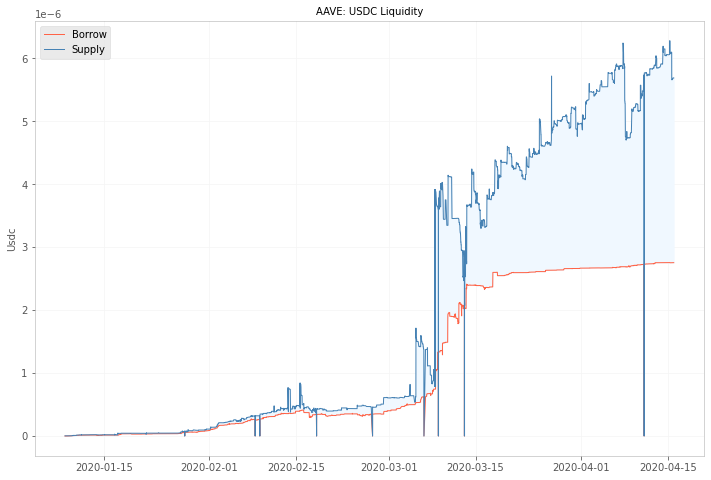

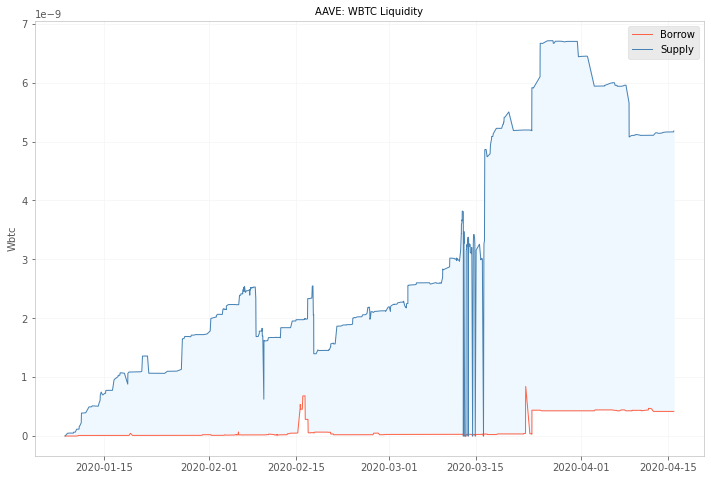

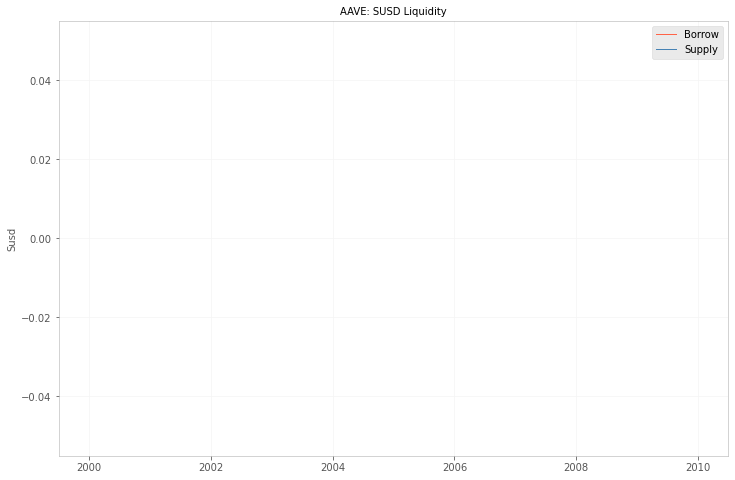

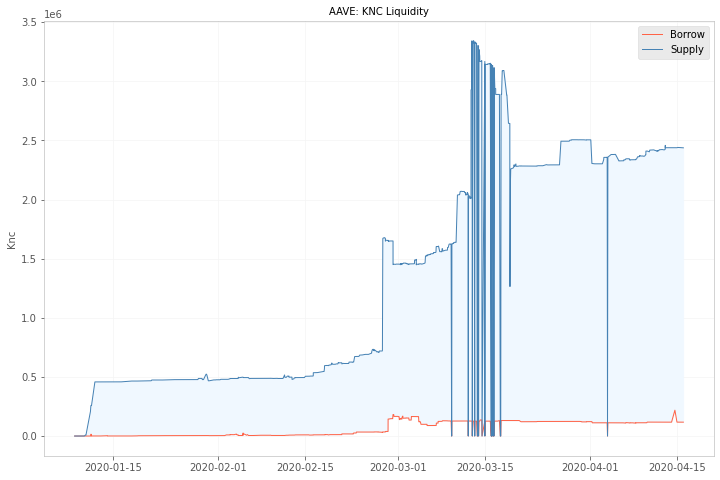

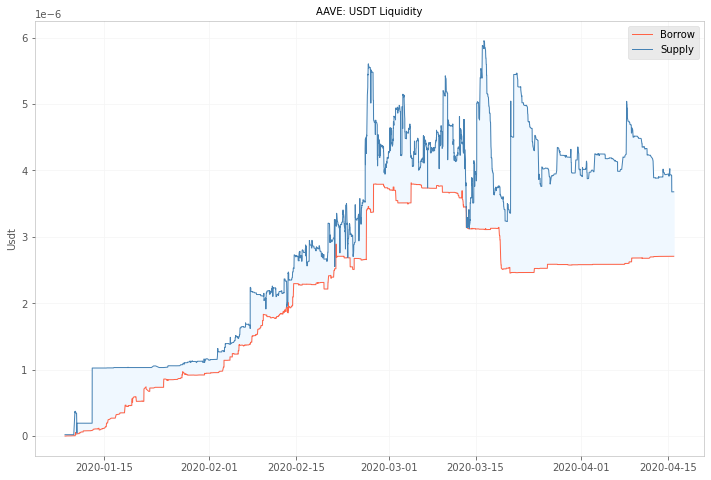

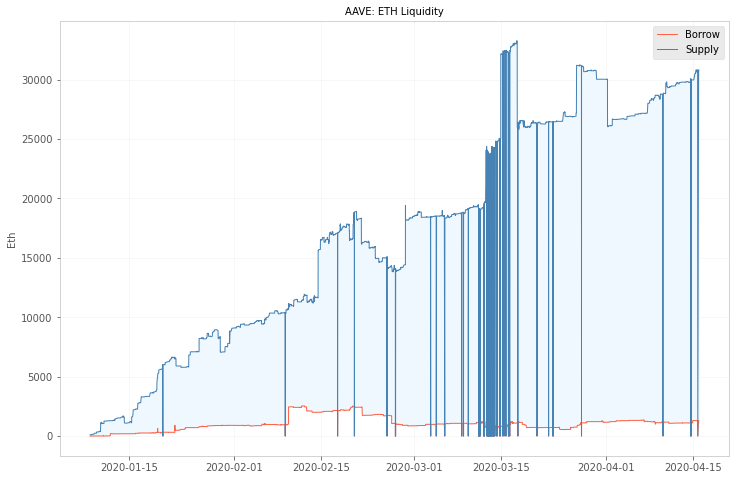

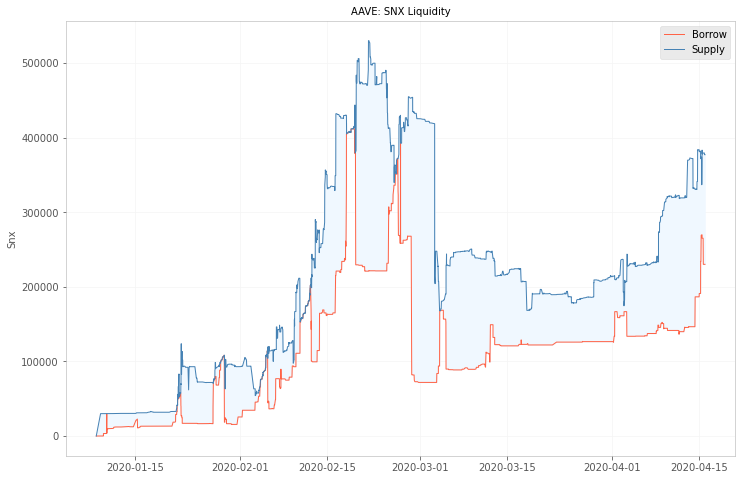

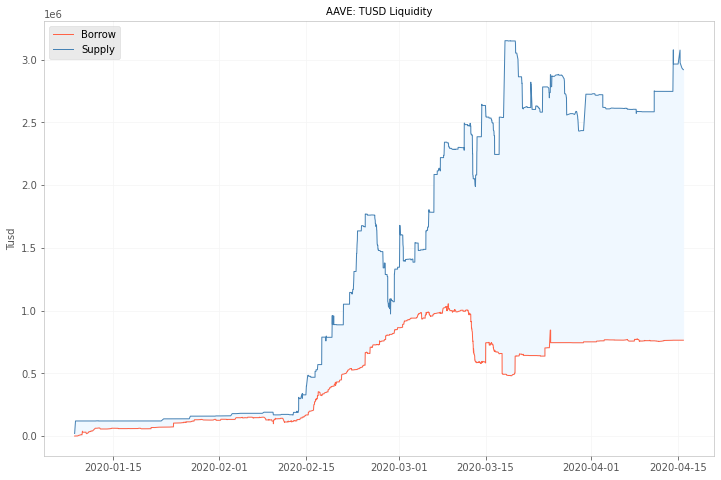

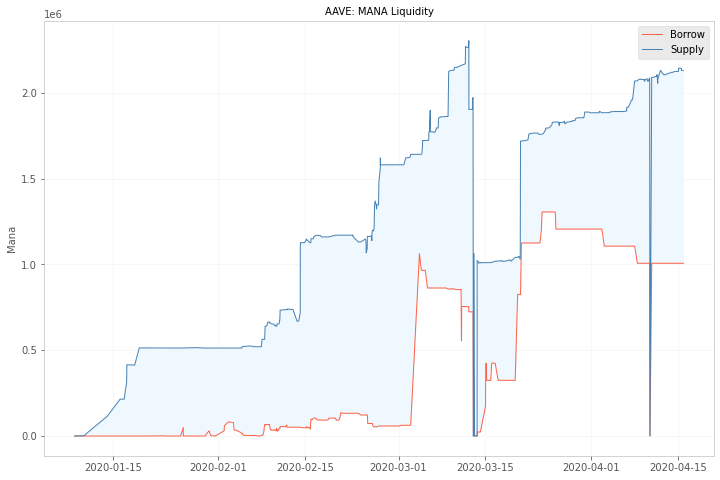

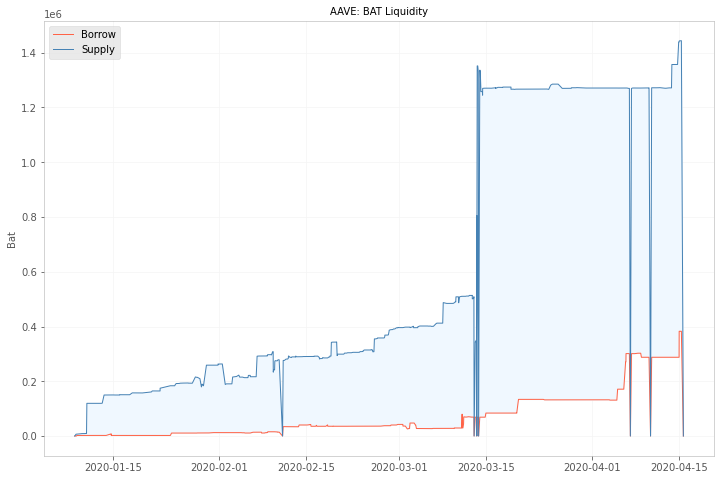

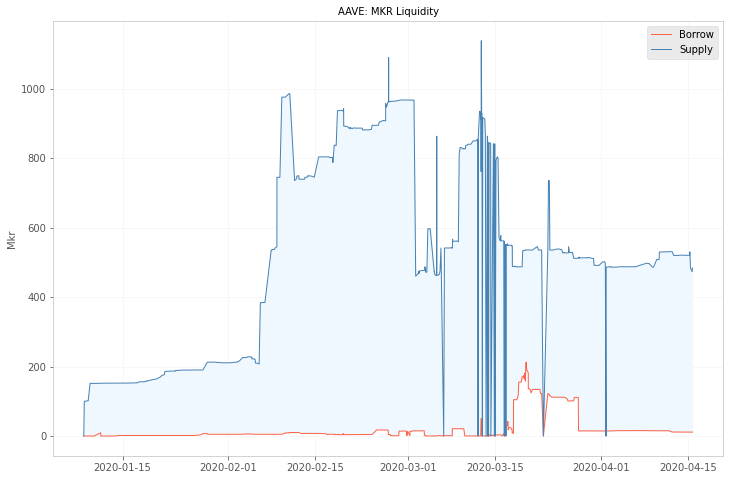

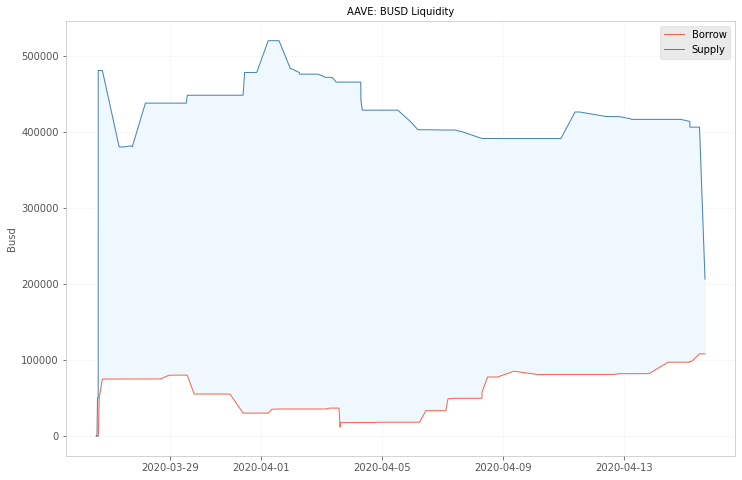

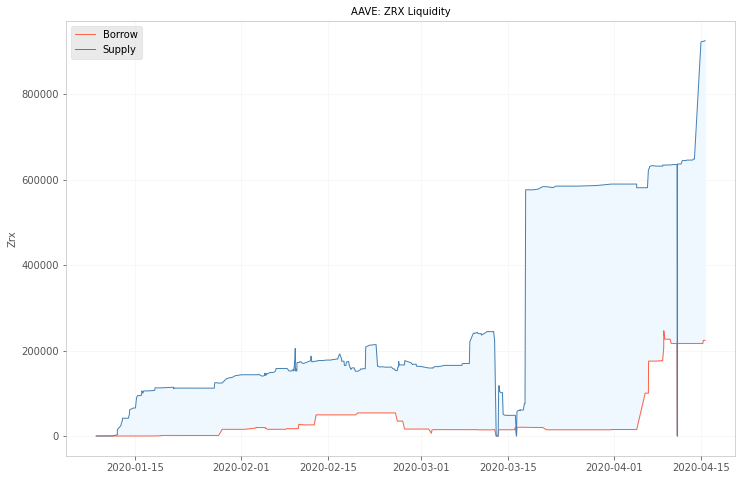

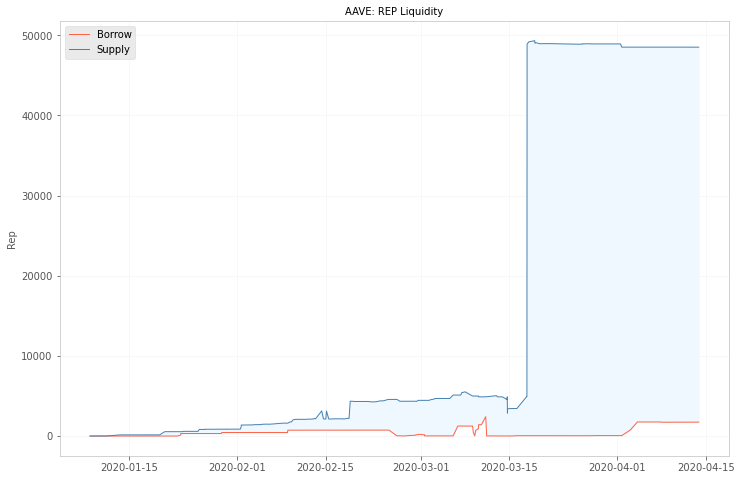

In [152]:
for market in aave['Currency'].unique():
    plot_aave_liquidity(market, aave)